# **Overview**

In today's digital age, recommender systems are important in helping users find relevant content amidst the plethora of options available. One popular approach to building recommendation systems is to use natural language processing (NLP) to understand content descriptions. In this project, I built a content-based movie recommendation system by utilizing movie descriptive data such as synopsis, genre, cast, and production crew.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # show all columns
pd.set_option('display.max_rows', None) # show all rows

In [3]:
# Read dataset and skip the bad lines

df1 = pd.read_csv('credits.csv', on_bad_lines='skip')
df2 = pd.read_csv('movies_metadata.csv', on_bad_lines='skip')

C:\Users\USER\AppData\Local\Temp\ipykernel_8164\3388126666.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('movies_metadata.csv', on_bad_lines='skip')


In [5]:
# Show the head of dataset
df1.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [7]:
df2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# Show the id of the dataset, and analysis the redundant data from dataset
#df1['id']

In [17]:
#df2['id']

In [ ]:
#df2['id'].value_counts()

Because the output of the run is too long, I don't show the output, you can run the output in https://colab.research.google.com to view.

From the above id check, there are 3 redundant values obtained, we discard these values:

In [9]:
df2 = df2[df2.id !='1997-08-20']
df2 = df2[df2.id !='2012-09-29']
df2 = df2[df2.id !='2014-01-01']

In [11]:
df2.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [13]:
df1.columns

Index(['cast', 'crew', 'id'], dtype='object')

Convert the "id" column to integer type so that we can merge the two dataset files into one dataset.

In [15]:
df2['id'] = df2['id'].astype(int)

In [17]:
# drop duplicates so that all movies are unique and there are no duplicates

df1 = df1.drop_duplicates(subset=['id'])
df2 = df2.drop_duplicates(subset=['id'])

In [19]:
# merge the dataset

df2=df2.merge(df1, on='id')

In [21]:
#for the recommendation parameter of the model I used the overview and genres columns.

df2['genres_overview'] = df2['genres'] * 3 + df2['overview']

In [23]:
df2.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,genres_overview
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 35, 'name': 'Comedy'}][{'id': 35, 'nam..."


In [25]:
df2['genres_overview'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4    [{'id': 35, 'name': 'Comedy'}][{'id': 35, 'nam...
Name: genres_overview, dtype: object

In [27]:
#Import TfIdfVectorizer from scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'

tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string

df2['genres_overview'] = df2['genres_overview'].fillna('')

In [29]:
#import linear kernal to calculate similarity between vectors

from sklearn.metrics.pairwise import linear_kernel

Since the limited RAM (8GB) caused the kernel to crash when calculating the dot product for all 45,000 movies, the solution was to use a random subset of 10,000-15,000 entries to calculate Cosine Similarity.

In [31]:
# takes a random subset of the dataset to calculate the Cosine Similarity value.

import random
ran = random.randint(10000, 15000)
# ran = random.randint(25000, 35000) -> max ram = 16 GB
# ran = random.randint(10000, 15000) -> if ram < 16 GB
df3 = df2.head(ran)
df3.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,genres_overview
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 35, 'name': 'Comedy'}][{'id': 35, 'nam..."


In [33]:
# Text preprocessing before TF-IDF

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Re-download the essentials
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')  # For WordNet Lemmatizer (if use english)

# Stopwords inisialization
stop_words = set(stopwords.words('english'))
stop_words.update(['name', 'id'])

# Text cleaning function
def preprocess_text(text):
    # Lowercase
    text = text.lower() #lowering
    # Delete URL, username, and non-alphanumeric characters -> regex
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    # Delete numbers
    text = re.sub(r"\d+", "", text)
    # Delete special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Delete stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Recombine tokens into text
    text = ' '.join(tokens)
    return text

# pre-processing
df3['genres_overview'] = df3['genres_overview'].apply(preprocess_text)

<>:26: SyntaxWarning: invalid escape sequence '\w'
<>:26: SyntaxWarning: invalid escape sequence '\w'
C:\Users\USER\AppData\Local\Temp\ipykernel_8164\1822090712.py:26: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roami

In [35]:
# check the result of text preprocessing

df3['genres_overview'].head()

0    animation comedy family animation comedy famil...
1    adventure fantasy family adventure fantasy fam...
2    romance comedy romance comedy romance comedy f...
3    comedy drama romance comedy drama romance come...
4    comedy comedy comedy george bank ha recovered ...
Name: genres_overview, dtype: object

In [37]:
# EDA using wordcloud

from wordcloud import WordCloud

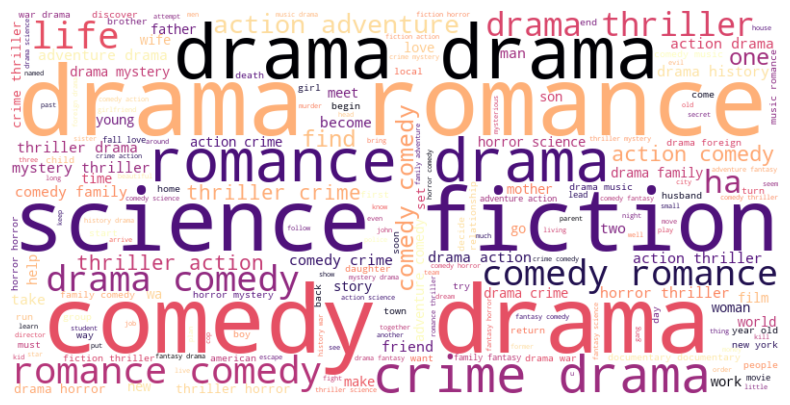

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Merge all text in cast_overview
text = ' '.join(df3['genres_overview'].dropna())

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(text)

# Show word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
# TF-IDF

tfidf_matrix = tfidf.fit_transform(df3['genres_overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(10454, 29164)

In [43]:
tfidf_matrix

<10454x29164 sparse matrix of type '<class 'numpy.float64'>'
	with 298466 stored elements in Compressed Sparse Row format>

In [45]:
# Cosine Similarity

cosine_sim =  linear_kernel(tfidf_matrix, tfidf_matrix, True)

Now, I created a function get_movie_recommendation that accepts movie titles from the user and recommends similar movies based on the Cosine Similarity Scores of the most similar movies.
This function will recommend the 5 most similar movies.

In [47]:
indices = pd.Series(df3.index, index=df3['title']).drop_duplicates()

In [49]:
# Get Recommendations

def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df3['title'].iloc[movie_indices]

In [70]:
# Testing Recommendation Code

get_recommendations('Toy Story 2')

0                     Toy Story
1810             Small Soldiers
1921    The Million Dollar Duck
2285     Santa Claus: The Movie
2141                       Toys
Name: title, dtype: object

In [53]:
get_recommendations('Jumanji')

6034                        Into the West
59             The Indian in the Cupboard
9533    Charlie and the Chocolate Factory
5480                        Spirited Away
1940                  Herbie Goes Bananas
Name: title, dtype: object

In [72]:
get_recommendations('Spirited Away')

2759                                Thumbelina
4859                 Jimmy Neutron: Boy Genius
2684    Little Nemo: Adventures In Slumberland
622                    All Dogs Go to Heaven 2
4977                      Return to Never Land
Name: title, dtype: object

# **Summary:**

I successfully developed a recommender system that uses encodings along with TF-IDF to determine word frequencies and calculate matrices.

Furthermore, I used Cosine Similarity to evaluate the similarity between words and recommended the 5,10 most similar movies based on the movie titles given by the user as input.

The results generated in the recommendation are quite relevant to the movies in question. For “Toy Story 2,” the suggested films, such as “Toy Story” and “Toys” effectively align with the themes of animation and the toy world, making them strong choices. Looking at the “Jumanji” recommendations, films like “Charlie and the Chocolate Factory” and “The Indian in the Cupboard” do encompass elements of adventure and fantasy, though there's some variability in the degree of similarity. For “Spirited Away,” movies like “Thumbelina” and “Little Nemo” continue to resonate with the themes of animation, adventure, and imaginative exploration. Overall, while the system has performed well with these recommendations, there may be opportunities to enhance the degree of similarity for certain titles, particularly with the adventure and fantasy genres.

But I found that my first few experiments didn’t turn out as well as I hoped because many of the recommendations just didn’t match the movie titles I entered. This recommendation system uses text similarity to suggest titles you might like, relying on methods like TF-IDF and cosine similarity. However, sometimes the results can be a bit off. For instance, two movies might have similar keywords, but their stories, atmospheres, or target audiences can be quite different. So, while you might find some great suggestions, they might not always hit the mark. To make things better, I decided to boost the weight of the genres column to three times its original value. This change helped me get results that were much more relevant and in line with what I was looking for!